## Question

TMDB Box Office Prediction:

Description: In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You can also collect other public data to make the prediction.

Competition Length: today -> Nov 30th

Prepare your code:

1. Download the data.

2. Preprocess the data into a clean format.

3. Train your model and run prediction on the test set

4. Submit your solution to Kaggle for evaluation.

In [842]:
# Solve this question with linear regression => https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview

# Importing the libraries
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import re

# Random seed
np.random.seed(0)





In [843]:
# Importing the train_data
train_data = pd.read_csv('./data/train.csv')
train_data = train_data.drop(['id'], axis=1)
test_data = pd.read_csv('./data/test.csv')
test_data = test_data.drop(['id'], axis=1)

# Replace belongs_to_collection with {} using lambda function
train_data['belongs_to_collection'] = train_data['belongs_to_collection'].apply(lambda x: eval(x) if pd.notnull(x) else {})
test_data['belongs_to_collection'] = test_data['belongs_to_collection'].apply(lambda x: eval(x) if pd.notnull(x) else {})



train_data.head(10)



,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,{},8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,{},14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,{},0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0da

### About data 

- Data Description id - Integer unique id of each movie

- belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

- budget:Budget of a movie in dollars. 0 values mean unknown.

- genres : Contains all the Genres Name & TMDB Id in JSON Format

- homepage - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.

- imdb_id - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/

- original_language - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

- original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

- overview - Brief description of the movie.

- popularity - Popularity of the movie in float.

- poster_path - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/

- production_companies - All production company name and TMDB id in JSON format of a movie.

- production_countries - Two digit code and full name of the production company in JSON format.

- release_date - Release date of a movie in mm/dd/yy format.

- runtime - Total runtime of a movie in minutes (Integer).

- spoken_languages - Two digit code and full name of the spoken language.

- status - Is the movie released or rumored?

- tagline - Tagline of a movie

- title - English title of a movie

- Keywords - TMDB Id and name of all the keywords in JSON format.

- cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

- crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

- revenue - Total revenue earned by a movie in dollars.



## Exploratory Data Analysis (EDA)

In [844]:
train_data.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [845]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [846]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4398 non-null   object 
 1   budget                 4398 non-null   int64  
 2   genres                 4382 non-null   object 
 3   homepage               1420 non-null   object 
 4   imdb_id                4398 non-null   object 
 5   original_language      4398 non-null   object 
 6   original_title         4398 non-null   object 
 7   overview               4384 non-null   object 
 8   popularity             4398 non-null   float64
 9   poster_path            4397 non-null   object 
 10  production_companies   4140 non-null   object 
 11  production_countries   4296 non-null   object 
 12  release_date           4397 non-null   object 
 13  runtime                4394 non-null   float64
 14  spoken_languages       4356 non-null   object 
 15  stat

In [847]:
train_data.isnull().sum()

belongs_to_collection       0
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

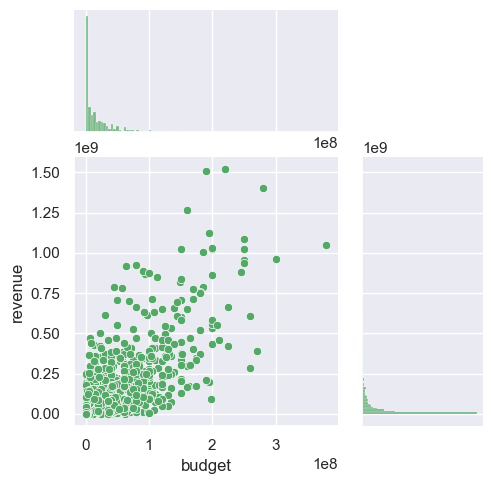

In [848]:
# Plot budget with revenue to see the correlation with sns
sns.jointplot(x="budget", y="revenue", data=train_data, height=5, ratio=2, color="g")
plt.show()


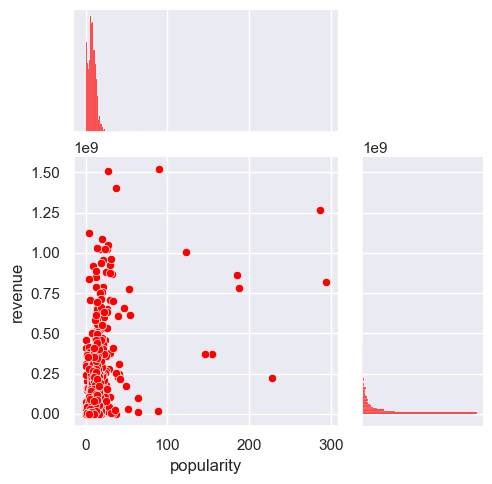

In [849]:
# Plot with popularity with revenue to see the correlation with sns
sns.jointplot(x="popularity", y="revenue", data=train_data, height=5, ratio=2, color="red")
plt.show()

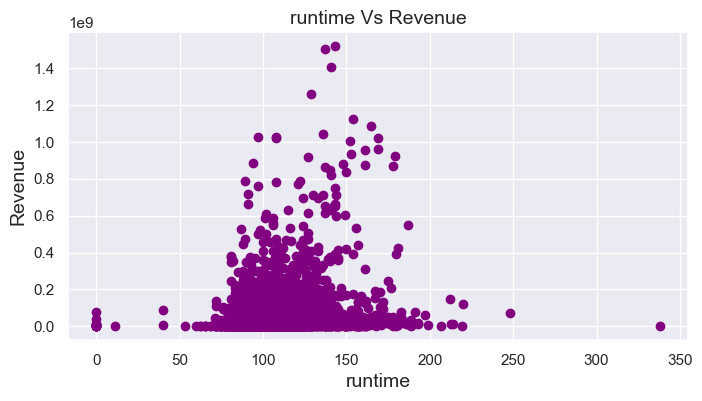

In [850]:
# plot with runtime with revenue to see the correlation
plt.figure(figsize=(8, 4))
plt.scatter(train_data['runtime'], train_data['revenue'], color='purple')
plt.title('runtime Vs Revenue', fontsize=14)
plt.xlabel('runtime', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/724610202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['revenue'], kde=True)
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/724610202.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(

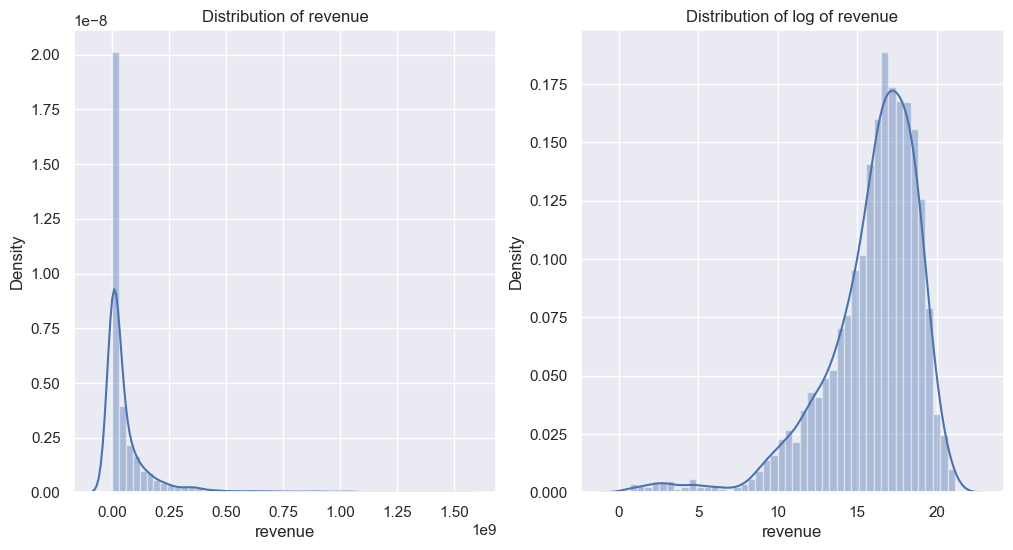

In [851]:
# Distribution of revenue
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(train_data['revenue'], kde=True)
plt.title('Distribution of revenue')
plt.subplot(122)
sns.distplot(np.log1p(train_data['revenue']), kde=True)
plt.title('Distribution of log of revenue')
plt.show()

In [852]:
# train_data["release_date"] = pd.to_datetime(train_data["release_date"])
# train_data["release_year"] = train_data["release_date"].dt.year
# train_data["release_month"] = train_data["release_date"].dt.month
# train_data["release_day"] = train_data["release_date"].dt.day
# train_data["release_day_name"] = train_data["release_date"].dt.day_name()
# ################
# test_data["release_date"] = pd.to_datetime(test_data["release_date"])
# test_data["release_year"] = test_data["release_date"].dt.year
# test_data["release_month"] = test_data["release_date"].dt.month
# test_data["release_day"] = test_data["release_date"].dt.day
# test_data["release_day_name"] = test_data["release_date"].dt.day_name()

In [853]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train_data[['release_month','release_day','release_year']]=train_data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
train_data.loc[ (train_data['release_year'] <= 19) & (train_data['release_year'] < 100), "release_year"] += 2000
train_data.loc[ (train_data['release_year'] > 19)  & (train_data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train_data['release_date']) 
train_data['release_dayofweek'] = releaseDate.dt.dayofweek
train_data['release_quarter'] = releaseDate.dt.quarter


#####

test_data[['release_month','release_day','release_year']]=test_data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
test_data.loc[ (test_data['release_year'] <= 19) & (test_data['release_year'] < 100), "release_year"] += 2000
test_data.loc[ (test_data['release_year'] > 19)  & (test_data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(test_data['release_date'])
test_data['release_dayofweek'] = releaseDate.dt.dayofweek
test_data['release_quarter'] = releaseDate.dt.quarter


In [854]:
train_data['release_year'].value_counts()
# Select 2030 year movies from release_year and print release year and revenue
train_data.loc[train_data['release_year'] == 2030][['release_year', 'release_date', 'revenue']]

,release_year,release_date,revenue


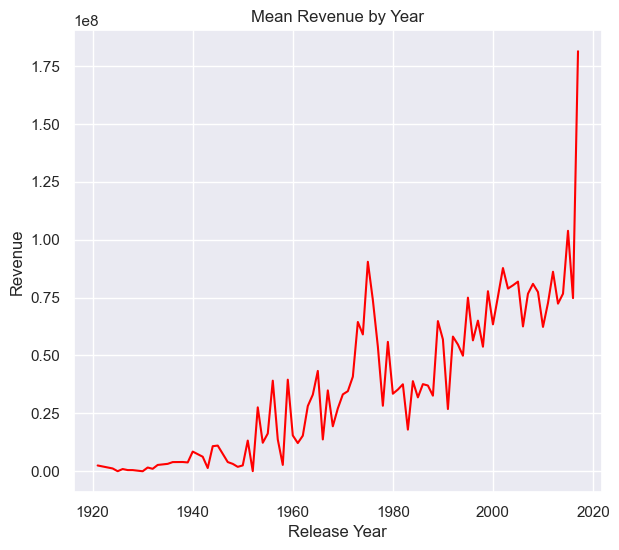

In [855]:
train_data.sample(10)
# Plot revenue with release_year to see the correlation
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(train_data.groupby('release_year')['revenue'].mean(), color='red')
plt.title('Mean Revenue by Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [856]:
# Print overview

train_data['overview'].head(10)

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
5    Pinocchio and his friends, a glow worm and a m...
6    A young girl buys an antique box at a yard sal...
7    A chronicle which provides a rare window into ...
8    After telling the story of Flint's last journe...
9    In "A Mighty Wind", director Christopher Guest...
Name: overview, dtype: object

In [857]:
train_data['imdb_id'].head(10)

0    tt2637294
1    tt0368933
2    tt2582802
3    tt1821480
4    tt1380152
5    tt0093743
6    tt0431021
7    tt0391024
8    tt0117110
9    tt0310281
Name: imdb_id, dtype: object

## Add Additional Features on imdb_id

[Link ](https://datasets.imdbws.com/)


In [858]:
# Combine title.ratings.tsv in train_data with imdb_id in train_data
title_ratings = pd.read_csv('./data/title.ratings.tsv', sep='\t')
title_ratings.head(10)

# Merge title_ratings with train_data
train_data = pd.merge(train_data, title_ratings, how='left', left_on='imdb_id', right_on='tconst')
test_data = pd.merge(test_data, title_ratings, how='left', left_on='imdb_id', right_on='tconst')


train_data.head(10)



,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,crew,revenue,release_month,release_day,release_year,release_dayofweek,release_quarter,tconst,averageRating,numVotes
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,4,1,tt2637294,5.0,40931.0
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004,4,3,tt0368933,5.8,86932.0
2,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014,4,4,tt2582802,8.5,943039.0
3,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,9,2012,4,1,tt1821480,8.1,64758.0
4,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,5,2009,3,1,tt1380152,5.7,323.0
5,{},8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,8,6,1987,3,3,tt0093743,6.2,733.0
6,{},14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,"[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,8,30,2012,3,3,tt0431021,5.9,62632.0
7,{},0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,"[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,1,15,2004,3,1,tt0391024,7.7,5231.0
8,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,"[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,2,16,1996,4,1,tt0117110,6.9,25854.0
9,{},6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,...,"[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,4,16,2003,2,2,tt0310281,7.2,29140.0


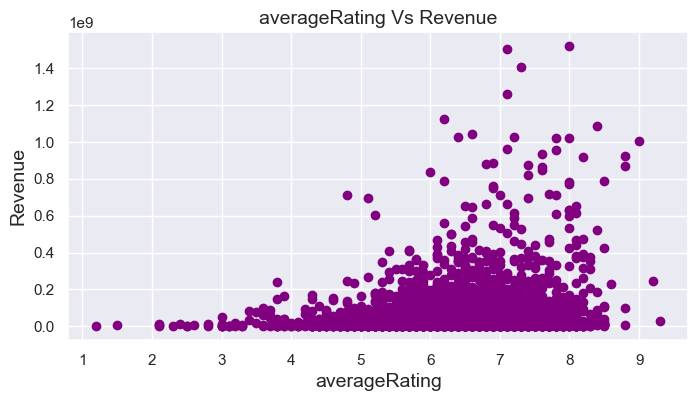

In [859]:
# Plot with average rating with revenue to see the correlation
plt.figure(figsize=(8, 4))
plt.scatter(train_data['averageRating'], train_data['revenue'], color='purple')
plt.title('averageRating Vs Revenue', fontsize=14)
plt.xlabel('averageRating', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()


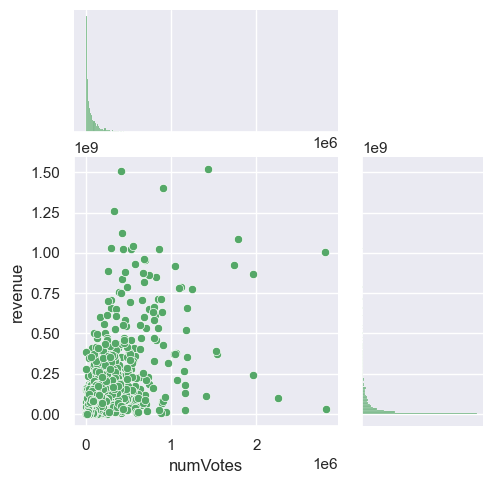

In [860]:
# Plot with numVotes with revenue sns
sns.jointplot(x="numVotes", y="revenue", data=train_data, height=5, ratio=2, color="g")
plt.show()






## Belong to Collection


In [861]:
# Fill {} values from title of movie

for index,row in train_data.iterrows():
    if row["belongs_to_collection"] != {}:
        for i in row["belongs_to_collection"]:
            train_data["belongs_to_collection"][index] = i["name"]
            test_data["belongs_to_collection"][index] = i["name"]
    else:
        title = row["title"]
        if (title.split()[0].isdigit()) and (len(title.split()) >= 1 ) :
            train_data["belongs_to_collection"][index] = (title.strip())+" Collection"
            test_data["belongs_to_collection"][index] = (title.strip())+" Collection"
        else:
            regex = r"([a-zA-Z \d \, \[ \] \' \. \& \( \) \_ \! \? \x00-\x7F]*)"
            train_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"
            test_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"

# Fill {} values from title of movie for test_data

# for index,row in test_data.iterrows():
#     if row["belongs_to_collection"] != {}:
#         for i in row["belongs_to_collection"]:
#             test_data["belongs_to_collection"][index] = i["name"]
#     else:
#         title = row["title"]
#         if (title.split()[0].isdigit()) and (len(title.split()) >= 1 ) :
#             test_data["belongs_to_collection"][index] = (title.strip())+" Collection"
#         else:
#             regex = r"([a-zA-Z \d \, \[ \] \' \. \& \( \) \_ \! \? \x00-\x7F]*)"
#             test_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"

train_data[["belongs_to_collection","title"]].head(10)

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/1138292808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["belongs_to_collection"][index] = i["name"]
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/1138292808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["belongs_to_collection"][index] = i["name"]
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/1138292808.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,belongs_to_collection,title
0,Hot Tub Time Machine Collection,Hot Tub Time Machine 2
1,The Princess Diaries Collection,The Princess Diaries 2: Royal Engagement
2,Whiplash Collection,Whiplash
3,Kahaani Collection,Kahaani
4,Marine Boy Collection,Marine Boy
5,Pinocchio and the Emperor of the Night Collection,Pinocchio and the Emperor of the Night
6,The Possession Collection,The Possession
7,Control Room Collection,Control Room
8,The Muppet Collection,Muppet Treasure Island
9,A Mighty Wind Collection,A Mighty Wind


In [862]:
test_data[["belongs_to_collection","title"]].head(10)

,belongs_to_collection,title
0,Hot Tub Time Machine Collection,Pokémon: The Rise of Darkrai
1,The Princess Diaries Collection,Attack of the 50 Foot Woman
2,Whiplash Collection,Addicted to Love
3,Kahaani Collection,Incendies
4,Marine Boy Collection,Inside Deep Throat
5,Pinocchio and the Emperor of the Night Collection,SubUrbia
6,The Possession Collection,Three
7,Control Room Collection,The Tigger Movie
8,The Muppet Collection,Becoming Jane
9,A Mighty Wind Collection,Toy Story 2


### Budget 

In [863]:
train_data.isnull().sum()

belongs_to_collection       0
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_month               0
release_day                 0
release_year                0
release_dayofweek           0
release_quarter             0
tconst                      1
averageRating               1
numVotes                    1
dtype: int64

## Spoken Languages


In [864]:
train_data["spoken_languages"] = train_data["spoken_languages"].apply(lambda x: train_data["spoken_languages"].mode()[0] if x=={} else x)
test_data["spoken_languages"] = test_data["spoken_languages"].apply(lambda x: test_data["spoken_languages"].mode()[0] if x=={} else x)

In [865]:
train_data["spoken_languages"].head(10)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5             [{'iso_639_1': 'en', 'name': 'English'}]
6             [{'iso_639_1': 'en', 'name': 'English'}]
7    [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8             [{'iso_639_1': 'en', 'name': 'English'}]
9             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [866]:
# Convert sponken_languages from string to list

train_data["spoken_languages"] = train_data["spoken_languages"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["spoken_languages"] = test_data["spoken_languages"].apply(lambda x: eval(x) if pd.notnull(x) else [])
list_of_languages = list(train_data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train_data["languages_count"] = train_data["spoken_languages"].apply(lambda x: len(x))
train_data['all_languages'] = train_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train_data['language_' + g] = train_data['all_languages'].apply(lambda x: 1 if g in x else 0)
test_data["languages_count"] = test_data["spoken_languages"].apply(lambda x: len(x))
test_data['all_languages'] = test_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test_data['language_' + g] = test_data['all_languages'].apply(lambda x: 1 if g in x else 0)

In [867]:
train_data[["spoken_languages","languages_count"]]

,spoken_languages,languages_count
0,"[{'iso_639_1': 'en', 'name': 'English'}]",1
1,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2,"[{'iso_639_1': 'en', 'name': 'English'}]",1
3,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2
4,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",1
...,...,...
2995,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2996,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",1
2997,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2998,"[{'iso_639_1': 'en', 'name': 'English'}]",1


## Keywords

In [868]:
# Replace null with [] in keywords
train_data["Keywords"] = train_data["Keywords"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["Keywords"] = test_data["Keywords"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["Keywords"].head(10)

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                   []
5                                                   []
6                                                   []
7    [{'id': 917, 'name': 'journalism'}, {'id': 163...
8    [{'id': 2041, 'name': 'island'}, {'id': 4418, ...
9    [{'id': 11800, 'name': 'mockumentary'}, {'id':...
Name: Keywords, dtype: object

In [869]:
train_data["Keywords_count"] = train_data["Keywords"].apply(lambda x: len(x))
#######3
test_data["Keywords_count"] = test_data["Keywords"].apply(lambda x: len(x))

In [870]:
train_data[["Keywords","Keywords_count"]]

,Keywords,Keywords_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",4
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",4
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",12
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",7
4,[],0
...,...,...
2995,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",19
2996,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",6
2997,"[{'id': 441, 'name': 'assassination'}, {'id': ...",14
2998,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...",22


# Homepage

In [871]:
train_data["homepage"].head(10)

0                                   NaN
1                                   NaN
2     http://sonyclassics.com/whiplash/
3            http://kahaanithefilm.com/
4                                   NaN
5                                   NaN
6    http://www.thepossessionmovie.com/
7                                   NaN
8                                   NaN
9                                   NaN
Name: homepage, dtype: object

In [872]:
# Convert homepage is null or not to 0 or 1
train_data["homepage"] = train_data["homepage"].apply(lambda x: 0 if pd.isnull(x) else 1)
test_data["homepage"] = test_data["homepage"].apply(lambda x: 0 if pd.isnull(x) else 1)


In [873]:
train_data["homepage"].head(10)

0    0
1    0
2    1
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: homepage, dtype: int64

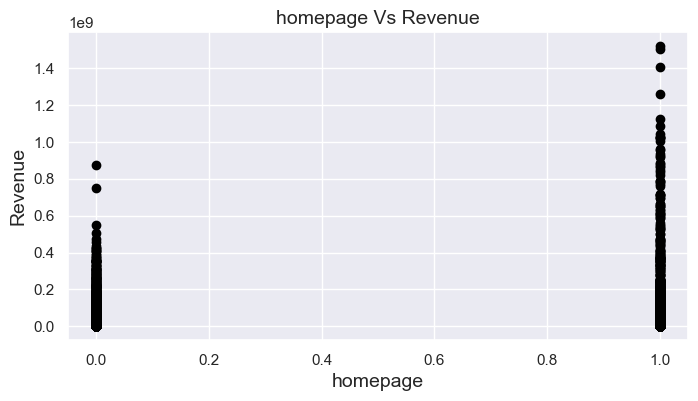

In [874]:
# Plot with homepage with revenue to see the correlation
plt.figure(figsize=(8, 4))
plt.scatter(train_data['homepage'], train_data['revenue'], color='black')
plt.title('homepage Vs Revenue', fontsize=14)
plt.xlabel('homepage', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

## Cast and Crew

In [875]:
# Deal with null values in cast and crew
train_data["cast"] = train_data["cast"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["cast"] = test_data["cast"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["cast"].head(10)

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
5    [{'cast_id': 6, 'character': 'Pinocchio (voice...
6    [{'cast_id': 23, 'character': 'Clyde', 'credit...
7    [{'cast_id': 2, 'character': 'Himself', 'credi...
8    [{'cast_id': 1, 'character': 'Long John Silver...
9    [{'cast_id': 24, 'character': 'Jonathan Steinb...
Name: cast, dtype: object

In [876]:
# Check null values in crew
train_data["crew"] = train_data["crew"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["crew"] = test_data["crew"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["crew"].head(10)


0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
5    [{'credit_id': '52fe46f49251416c9106558b', 'de...
6    [{'credit_id': '52fe4981c3a368484e12ee29', 'de...
7    [{'credit_id': '52fe47a69251416c750a0daf', 'de...
8    [{'credit_id': '52fe43c89251416c7501deb3', 'de...
9    [{'credit_id': '52fe45609251416c750545b3', 'de...
Name: crew, dtype: object

In [877]:
train_data.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   7
homepage                 0
imdb_id                  0
                        ..
language_فارسی           0
language_Tiếng Việt      0
language_اردو            0
language_Română          0
Keywords_count           0
Length: 63, dtype: int64

## Tagline

In [878]:

train_data["tagline"].head(10)

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                 Fear The Demon That Doesn't Fear God
7                Different channels. Different truths.
8                          Set sail for Muppet mayhem!
9             Back together for the first time, again.
Name: tagline, dtype: object

In [879]:
# Since we will not be analyzing content, we instead will simply check if the movie has a tagline or not.
train_data['has_tagline'] = train_data.tagline.apply(lambda x: 1 if type(x) == str else 0)
test_data['has_tagline'] = test_data.tagline.apply(lambda x: 1 if type(x) == str else 0)

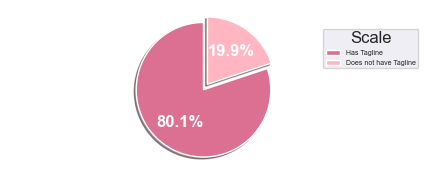

In [880]:
# plotting belongs to collection data
labels = 'Has Tagline', 'Does not have Tagline'
btc_1 = [(train_data.has_tagline == 1).sum(axis=0), (train_data.has_tagline == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['palevioletred', 'lightpink']

# plot
fig, ax = plt.subplots(figsize=(5,2))
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 12, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Scale",
          loc="center left",
          fontsize=5,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

## Production Companies and counteries

In [881]:
# Remove null values from Production_companies and Production_countries

train_data["production_companies"] = train_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["production_companies"] = test_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["production_countries"] = train_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["production_countries"] = test_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])


In [882]:
# filler = train_data["production_companies"].value_counts().index.to_list()[1]
# train_data["production_companies"] = train_data["production_companies"].apply(lambda x: filler if x=={} else x)
# fillert = test_data["production_companies"].value_counts().index.to_list()[1]
# test_data["production_companies"] = test_data["production_companies"].apply(lambda x: fillert if x=={} else x)

In [883]:
list_of_companies = list(train_data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_data["companies_count"] = train_data["production_companies"].apply(lambda x: len(x))
train_data['all_production_companies'] = train_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train_data['production_company_' + g] = train_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)
test_data["companies_count"] = test_data["production_companies"].apply(lambda x: len(x))
test_data['all_production_companies'] = test_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test_data['production_company_' + g] = test_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)

In [884]:
train_data[["production_companies","companies_count"]]

,production_companies,companies_count
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",3
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",3
3,[],0
4,[],0
...,...,...
2995,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",2
2996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...",2
2997,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",3
2998,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",2


In [885]:
train_data.sample(10)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films
2117,American Adobo Collection,344,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1,tt0294289,en,American Adobo,The everyday struggles of people trying to bri...,0.158651,/ndSs6DPEXYZRNZdacR7Ysq7jMJ7.jpg,...,0,0,0,0,0,0,0,0,0,0
2802,Harry Potter Collection,100000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0,tt0295297,en,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",29.741452,/sdEOH0992YZ0QSxgXNIGLq1ToUi.jpg,...,0,0,0,0,0,0,0,0,0,0
2522,Evil Dead Collection,3600000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",0,tt0092991,en,Evil Dead II,Ash Williams and his girlfriend Linda find a l...,13.520764,/n49mpgUsPgBfRg2qIEj31HX0chu.jpg,...,0,0,0,0,0,0,0,0,0,0
1828,Murder by Numbers Collection,50000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",0,tt0264935,en,Murder by Numbers,Tenacious homicide detective Cassie Mayweather...,9.645801,/zL2aUMe2haBikOZSxmndSDD4qi.jpg,...,0,0,0,0,0,0,0,0,0,0
206,One False Move Collection,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",0,tt0102592,en,One False Move,"Following a series of drug deals and murders, ...",3.143250,/2B3H16xQlZJJ3Py2QwuXN8rUjFh.jpg,...,0,0,0,0,0,0,0,0,0,0
2738,Atlantis Collection,120000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",1,tt0230011,en,Atlantis: The Lost Empire,The world's most highly qualified crew of arch...,10.901602,/9kbLIQEj99g5Hb9g1IG3VNdtt3h.jpg,...,0,0,0,0,0,0,0,0,0,0
2300,This is England Collection,2380000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1,tt0480025,en,This Is England,A story about a troubled boy growing up in Eng...,2.514638,/wVc7lwmTgDN7QY4G9V8dfYynDec.jpg,...,0,0,0,0,0,0,0,0,0,0
292,Unbroken Collection,65000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",1,tt1809398,en,Unbroken,"A chronicle of the life of Louis Zamperini, an...",10.543955,/1un8i8UtCjSCnY3OfdxtB5kDRvF.jpg,...,0,0,0,0,0,0,0,0,0,0
593,Before... Collection,3000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",0,tt2209418,en,Before Midnight,We meet Jesse and Celine nine years on in Gree...,11.303240,/uDdobcCBfPObD2pqDSTjXxELt3c.jpg,...,0,0,0,0,0,0,0,0,0,0
1749,Standing Tall Collection,5000000,"[{'id': 18, 'name': 'Drama'}]",0,tt3791302,fr,La Tête haute,The film tells the story of Malony and his edu...,4.206655,/jDlc27CX5c6qUaNXoNq35qjkfZP.jpg,...,0,0,0,0,0,0,0,0,0,0


In [886]:
# Do same to production_countries

list_of_countries = list(train_data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_data["countries_count"] = train_data["production_countries"].apply(lambda x: len(x))
train_data['all_production_countries'] = train_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
for g in top_countries:
    train_data['production_country_' + g] = train_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
test_data["countries_count"] = test_data["production_countries"].apply(lambda x: len(x))
test_data['all_production_countries'] = test_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
    
train_data[["production_countries","countries_count"]]
train_data.sample(10)


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/4069189665.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/4069189665.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/i

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania
31,Cach Collection,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",1,tt0387898,fr,Caché,A married couple is terrorized by a series of ...,5.695860,/i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg,...,0,0,0,0,0,0,0,1,0,0
2780,Sudden Death Collection,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,0,0,0,0,0,0,0,0,0,0
1917,The Merry Widow Collection,592,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",0,tt0016104,en,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,/dCVkB0POblxtn3BegTNcwTPMKUP.jpg,...,0,0,0,0,0,0,0,0,0,0
2632,Red Planet Collection,80000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",0,tt0199753,en,Red Planet,Astronauts search for solutions to save a dyin...,8.534176,/sMholOUc89LQhp0X33JZExgxupB.jpg,...,0,0,0,0,0,0,0,0,0,0
104,Recep İvedik Serisi,0,"[{'id': 35, 'name': 'Comedy'}]",0,tt3477064,tr,Recep İvedik 4,Recep Ivedik coaches the children football tea...,1.590383,/uId6TKvmIXeACd76n0utAq1mYvL.jpg,...,0,0,0,0,0,0,0,0,0,0
2900,Rita's Last Fairy Tale Collection,200000,NaN,1,tt1766044,en,Poslednyaya skazka Rity,The film speaks about universal themes of love...,0.560685,/6dS0fDrigZiHUiwuS5yjJECc919.jpg,...,0,0,0,0,0,0,0,0,0,0
869,Tristan & Isolde Collection,31000000,"[{'id': 18, 'name': 'Drama'}]",0,tt0375154,en,Tristan & Isolde,An affair between the second in line to Britai...,15.672195,/8AAh97XRGbgQnMWMJ6atwEQhJQ1.jpg,...,1,0,0,0,0,0,0,0,0,0
2758,Miranda Collection,784170,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,tt0040597,en,Miranda,"A young married physician discovers a mermaid,...",0.578456,/1iHSVb8sKAfAJLY1aCdNUf3MPrx.jpg,...,0,0,0,0,0,0,0,0,0,0
1565,The Big Short Collection,28000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1,tt1596363,en,The Big Short,The men who made millions from a global econom...,13.143061,/p11Ftd4VposrAzthkhF53ifYZRl.jpg,...,0,0,0,0,0,0,0,0,0,0
1915,The Stroller Strategy Collection,0,"[{'id': 35, 'name': 'Comedy'}]",0,tt2520516,fr,La stratégie de la poussette,When Thomas Platz is suddenly made the guardia...,2.156134,/vxxmSRgGJeNVHpr5rxqmKRqN0S8.jpg,...,0,0,0,0,0,0,0,0,0,0


In [887]:
train_data[['production_countries','countries_count']].head(10)

,production_countries,countries_count
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
3,"[{'iso_3166_1': 'IN', 'name': 'India'}]",1
4,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",1
5,[],0
6,"[{'iso_3166_1': 'US', 'name': 'United States o...",2
7,[],0
8,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
9,"[{'iso_3166_1': 'US', 'name': 'United States o...",1


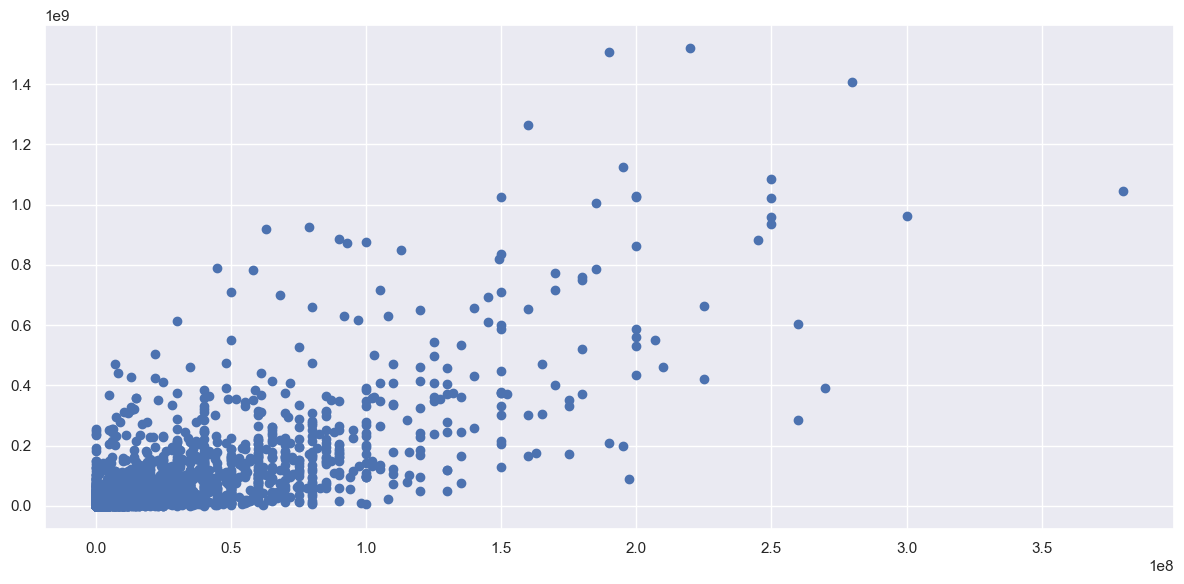

In [888]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["budget"],train_data["revenue"])
plt.tight_layout()

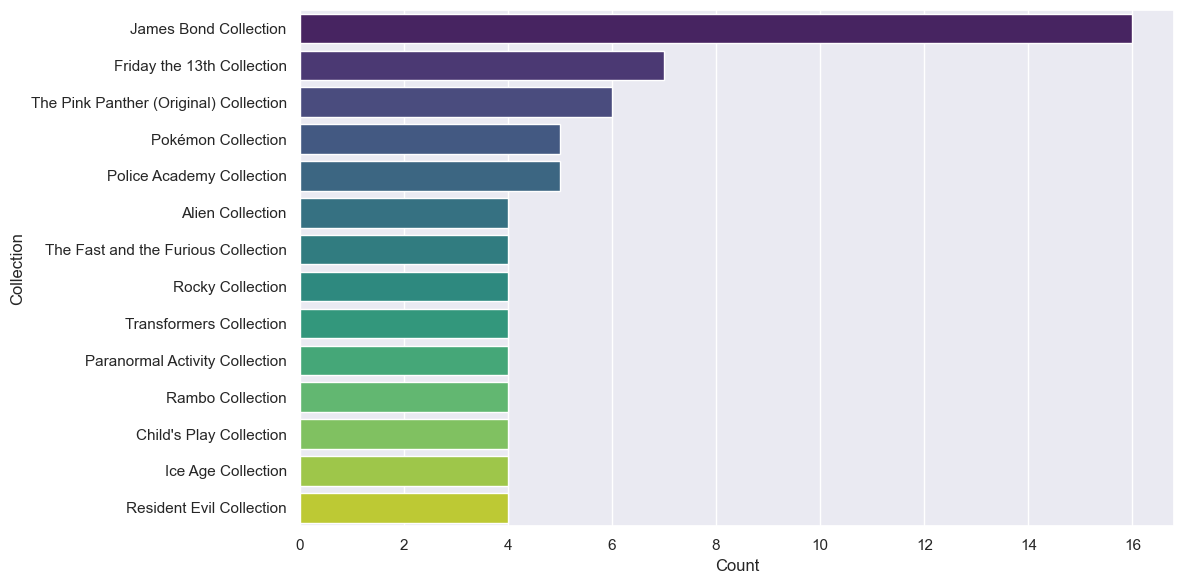

In [889]:
belongs_to_collection_data = train_data["belongs_to_collection"].value_counts()[:14].to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y=belongs_to_collection_data["index"],x=belongs_to_collection_data["belongs_to_collection"],palette="viridis")
plt.xlabel("Count")
plt.ylabel("Collection")
plt.tight_layout()

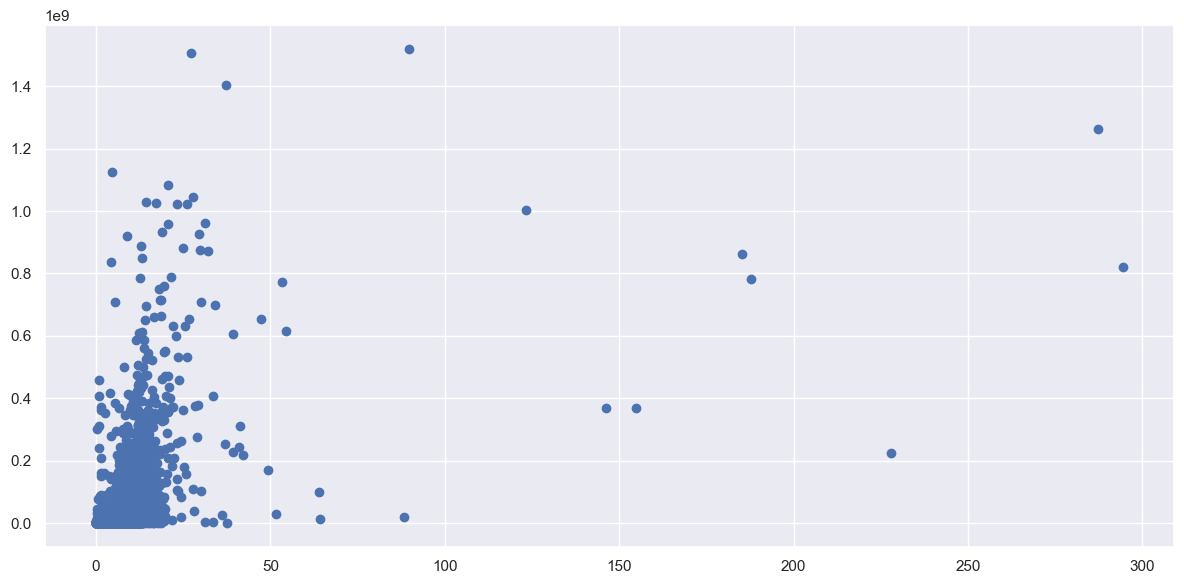

In [890]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["popularity"],train_data["revenue"])
plt.tight_layout()

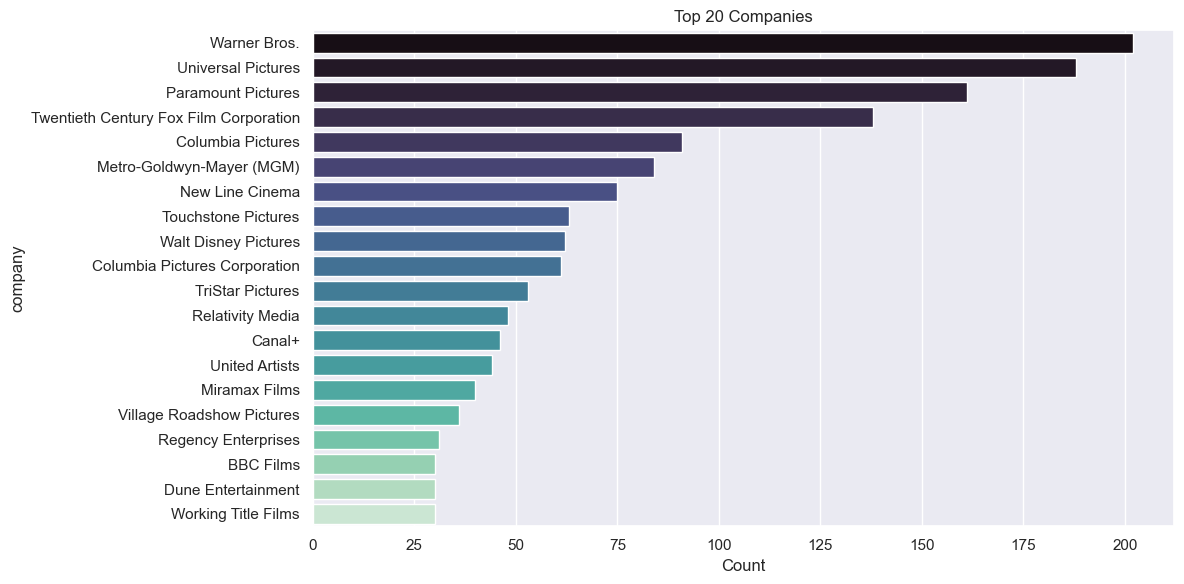

In [891]:
companies_count = (train_data["production_companies"].apply(lambda x: [i["name"] for i in x]))
companies_count = Counter([j for i in companies_count for j in i])
companies_count = companies_count.most_common()

companies_count = dict(companies_count)
company_data = pd.DataFrame({"company":companies_count.keys(),"Values":companies_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y = company_data[:20]["company"],x = company_data[:20]["Values"],palette="mako")
plt.title("Top 20 Companies")
plt.xlabel("Count")
plt.tight_layout()


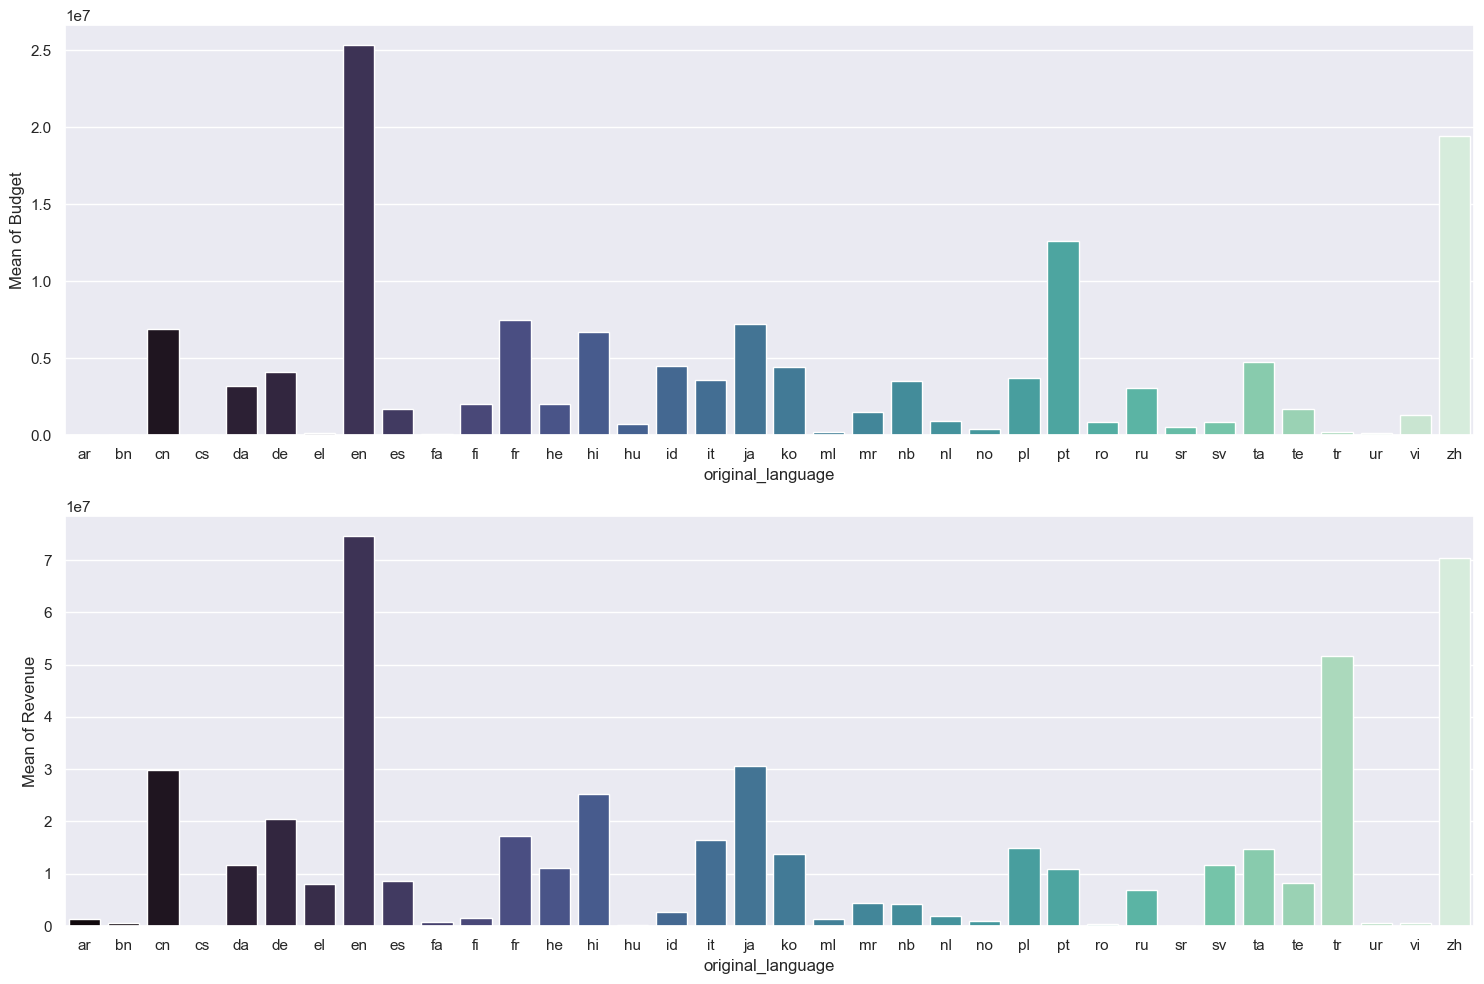

In [892]:
original_language_budget = train_data.groupby("original_language")[["budget","revenue"]].mean().reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["budget"],ax=ax[0],palette="mako")
ax1.set_ylabel("Mean of Budget")
ax2 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["revenue"],ax=ax[1],palette="mako")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

<Figure size 1300x600 with 0 Axes>

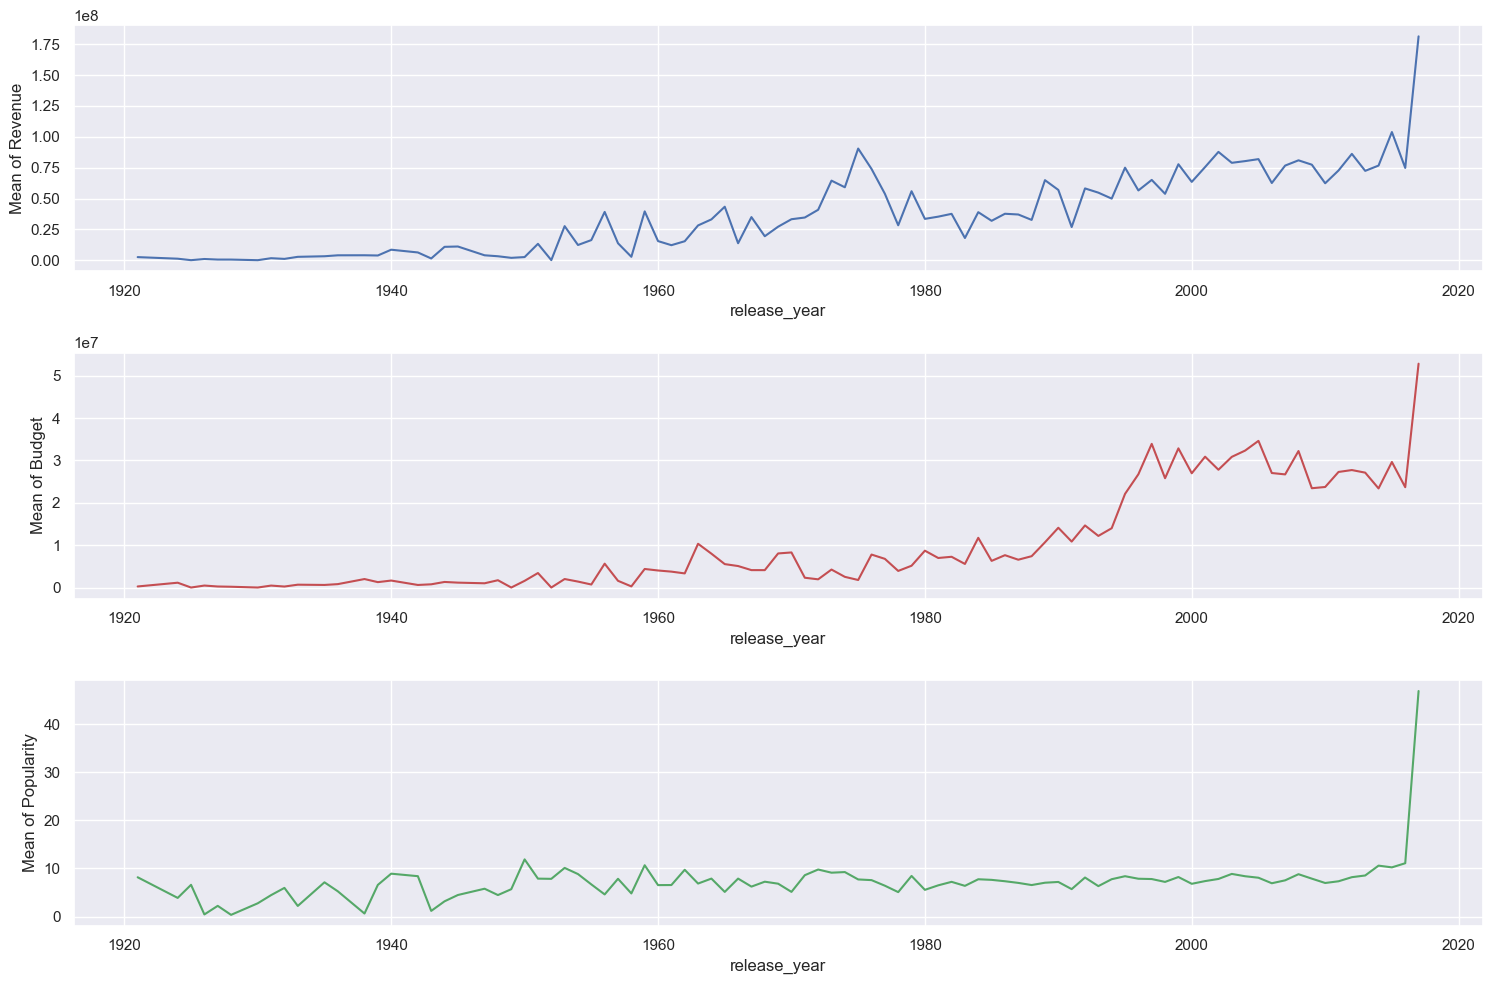

In [893]:
year_data = train_data.groupby("release_year")[["revenue","budget","popularity","runtime"]].mean().reset_index()
plt.figure(figsize=(13,6))
fig , ax = plt.subplots(3,1,figsize = (15,10))
ax1 = sns.lineplot(x=year_data["release_year"],y=year_data["revenue"],ax=ax[0])
ax1.set_ylabel("Mean of Revenue")
ax2 = sns.lineplot(x=year_data["release_year"],y=year_data["budget"],color="r",ax=ax[1])
ax2.set_ylabel("Mean of Budget")
ax3 = sns.lineplot(x=year_data["release_year"],y=year_data["popularity"],color="g",ax=ax[2])
ax3.set_ylabel("Mean of Popularity")
plt.tight_layout()

In [894]:
train_data.head(10)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania
0,Hot Tub Time Machine Collection,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0,0,0,0,0,0,0,0,0,0
1,The Princess Diaries Collection,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0,0,0,0,0,0,0,0,0,0
2,Whiplash Collection,3300000,"[{'id': 18, 'name': 'Drama'}]",1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0,0,0,0,0,0,0,0,0,0
3,Kahaani Collection,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0,0,0,0,0,0,0,0,0,0
4,Marine Boy Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0,0,0,0,0,0,0,0,0,0
5,Pinocchio and the Emperor of the Night Collection,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,0,0,0,0,0,0,0,0,0,0
6,The Possession Collection,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",1,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,0,0,0,0,0,0,0,0,0,0
7,Control Room Collection,0,"[{'id': 99, 'name': 'Documentary'}]",0,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,0,0,0,0,0,0,0,0,0,0
8,The Muppet Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",0,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,0,0,0,0,0,0,0,0,0,0
9,A Mighty Wind Collection,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",0,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,...,0,0,0,0,0,0,0,0,0,0


In [895]:
# # Create Genres columns with count of genres
# train_data['genres_count'] = train_data['genres'].apply(lambda x: len(x))

# list_of_genres = list(train_data['genres'])
# # Create all_genres column with all genres
# train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')

# # Create genres_[genre name] column with 1 if movie has this genre and 0 if not
# train_data["genre_count"] = train_data["genres"].apply(lambda x: len(x))
# # train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
# for g in top_genres:
#     train_data['genre_' + g] = train_data['all_genres'].apply(lambda x: 1 if g in x else 0)
# test_data["genre_count"] = test_data["genres"].apply(lambda x: len(x))
# test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')
# # test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_genres:
#     test_data['genre_' + g] = test_data['all_genres'].apply(lambda x: 1 if g in x else 0)

# train_data.head(10)

In [896]:
# all columns in list of columnx
list_of_columns = list(train_data.columns)
list_of_columns


['belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek',
 'release_quarter',
 'tconst',
 'averageRating',
 'numVotes',
 'languages_count',
 'all_languages',
 'language_English',
 'language_Français',
 'language_Español',
 'language_Deutsch',
 'language_Pусский',
 'language_Italiano',
 'language_日本語',
 'language_普通话',
 'language_हिन्दी',
 'language_',
 'language_Português',
 'language_العربية',
 'language_한국어/조선말',
 'language_广州话 / 廣州話',
 'language_தமிழ்',
 'language_Polski',
 'language_Magyar',
 'language_Latin',
 'language_svenska',
 'language_ภาษาไทย',
 'language_Český',
 'language_עִבְרִית',
 'language_ελληνικά',
 'language_Türkçe',
 'lang

In [897]:
# columns_to_drop=["all_genres","all_languages","all_production_companies","belongs_to_collection","genres","homepage","imdb_id","status","original_title","overview","poster_path","production_companies","production_countries","all_production_countries" ,"release_date","spoken_languages","tagline","title","Keywords","cast","crew","release_day_name"]
# train_data.drop(columns_to_drop,axis=1,inplace=True)

# Check null

In [898]:
null_cols = train_data.isnull().sum()
null_cols[null_cols > 0].index.tolist()


['genres',
 'overview',
 'poster_path',
 'runtime',
 'tagline',
 'tconst',
 'averageRating',
 'numVotes']

In [899]:
# Fill null of averageRating and numvotes with mean
train_data["averageRating"].fillna(train_data["averageRating"].mean(),inplace=True)
test_data["averageRating"].fillna(test_data["averageRating"].mean(),inplace=True)

train_data["numVotes"].fillna(train_data["numVotes"].mean(),inplace=True)
test_data["numVotes"].fillna(test_data["numVotes"].mean(),inplace=True)


In [900]:
null_cols = train_data.isnull().sum()
null_cols[null_cols > 0].index.tolist()



['genres', 'overview', 'poster_path', 'runtime', 'tagline', 'tconst']

## RunTime
This column represents the runtime, or the duration/length, of the movie in minutes. The runtime could have an impact on revenue, as it is possible that movies that are deemed 'too short' or 'too long' may get less viewership. This could also lead to an interesting discussion on attention span for watching a movie, however that is not considered for the purposes of this report.

In [901]:
#pre-processing
train_data.runtime = train_data.runtime.fillna(train_data.runtime.median())
test_data.runtime = test_data.runtime.fillna(test_data.runtime.median())

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/2000281368.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train_data.runtime, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/2000281368.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

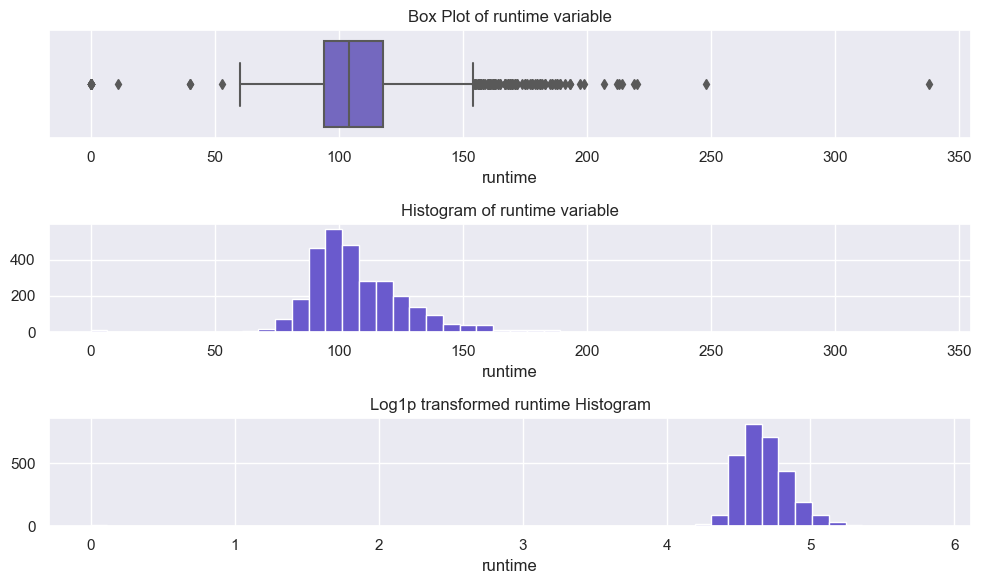

In [902]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_data.runtime, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=train_data.runtime, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(train_data.runtime), kde = False, ax = ax[2], color='slateblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

In [903]:
train_data.loc[train_data['runtime'].argmax(), ['title', 'runtime', 'revenue']]

# This movie is absurdly long and did not even do particularly well in the box office

train_data = train_data.drop(train_data['runtime'].argmax())




In [904]:
# Check error in data 

print('Movies with runtime listed as 0: ',(train_data.runtime == 0).sum())

Movies with runtime listed as 0:  12


In [905]:
# There are 12 movies with the runtime listed as 0 in the dataset, which is also a clear error as no movie will have 
# a true runtime of 0. We will replace these values the the median of the non-zero runtimes.

median = train_data.loc[train_data['runtime'] > 0, 'runtime'].median()
train_data["runtime_processed"] = train_data["runtime"].mask(train_data["runtime"] == 0, median)
test_data["runtime_processed"] = test_data["runtime"].mask(test_data["runtime"] == 0, median)

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/4186863390.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data["runtime_processed"] = test_data["runtime"].mask(test_data["runtime"] == 0, median)


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/2943396551.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train_data.runtime_processed, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_78475/2943396551.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

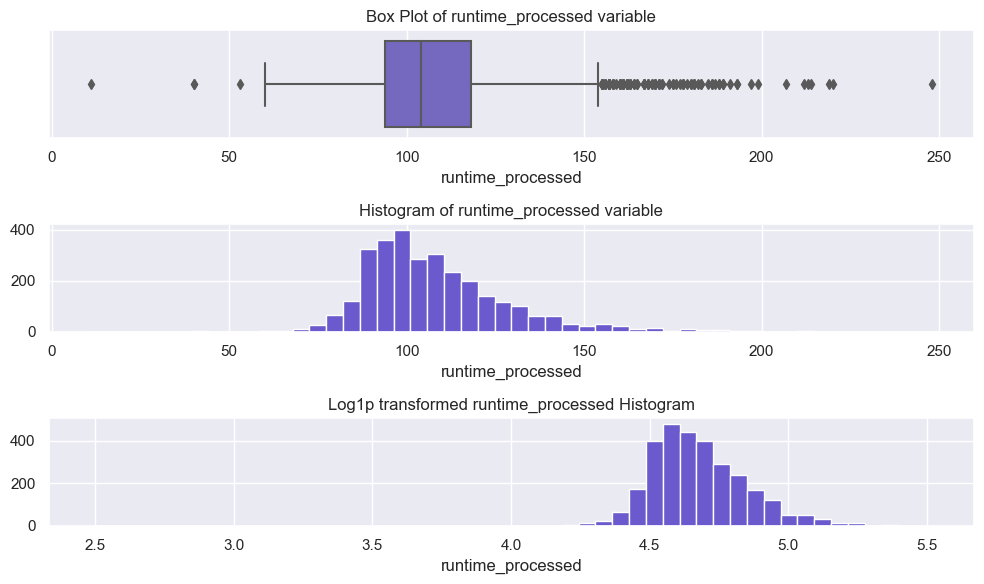

In [906]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_data.runtime_processed, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime_processed variable")
sns.distplot(a=train_data.runtime_processed, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime_processed variable")
sns.distplot(a=np.log1p(train_data.runtime_processed), kde = False, ax = ax[2], color='slateblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed runtime_processed Histogram")
f.tight_layout()

The distribution looks even cleaner now

## Feature Engineering

In [907]:
# Print all features
train_data.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path',
       ...
       'production_country_Denmark', 'production_country_Brazil',
       'production_country_Luxembourg', 'production_country_South Africa',
       'production_country_Hungary', 'production_country_United Arab Emirates',
       'production_country_Austria', 'production_country_Switzerland',
       'production_country_Romania', 'runtime_processed'],
      dtype='object', length=129)

In [908]:
train_data.sample(10)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania,runtime_processed
1586,Argo Collection,44500000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1,tt1024648,en,Argo,As the Iranian revolution reaches a boiling po...,14.238234,/oai3xLBQHpIh18VJdRCcL7D0Yg0.jpg,...,0,0,0,0,0,0,0,0,0,120.0
1321,Blade Collection,65000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",1,tt0359013,en,Blade: Trinity,"For years, Blade has fought against the vampir...",18.860681,/4WinsdHQBdh5aTt7Bd7T7dbUXbb.jpg,...,0,0,0,0,0,0,0,0,0,123.0
411,Seabiscuit Collection,87000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1,tt0329575,en,Seabiscuit,True story of the undersized Depression-era ra...,7.851669,/xzYOaFGZBNAciQXRasQQ8sYxBSi.jpg,...,0,0,0,0,0,0,0,0,0,141.0
1684,Easy on the Eyes Collection,2153912,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",0,tt3621288,ru,Legok na Pomine,After getting approval to sell the old mansion...,0.334881,/9YAVhnHha9YL6p5NnAnMURo5aVf.jpg,...,0,0,0,0,0,0,0,0,0,83.0
1071,Shaolin Soccer Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",0,tt0286112,cn,少林足球,A young Shaolin follower reunites with his dis...,8.461631,/JxiBDG2TuahaVj9ODwQveWzlDv.jpg,...,0,0,0,0,0,0,0,0,0,113.0
1781,The Illusionist Collection,18000000,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",1,tt0775489,fr,L'illusionniste,"Scotland, late 1950s. A struggling illusionist...",6.971611,/Ac2tNYW9sRaOhmtMJQuhf2mvo00.jpg,...,0,0,0,0,0,0,0,0,0,80.0
1282,Topaz Collection,4000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,tt0065112,en,Topaz,A French intelligence agent becomes embroiled ...,5.757907,/8u7vxykCVZoaxNocLbpstv3IFNK.jpg,...,0,0,0,0,0,0,0,0,0,143.0
1889,Brideshead Revisited Collection,20000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1,tt0412536,en,Brideshead Revisited,Based on Evelyn Waugh's 1945 classic British n...,11.069679,/9Vhxg4gqNZmFutd3CSMJjn3uKMl.jpg,...,0,0,0,0,0,0,0,0,0,133.0
2500,My Soul to Take Collection,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",0,tt0872230,en,My Soul to Take,A serial killer returns to his hometown to sta...,5.282976,/96LAzRlBdYyajKRZroLnae9qrpX.jpg,...,0,0,0,0,0,0,0,0,0,107.0
2914,Keeping Up with the Joneses Collection,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",1,tt2387499,en,Keeping Up with the Joneses,An ordinary suburban couple finds it‚Äôs not e...,9.485150,/ekg8qeNidEQ1ylHeahLtsTLPe2k.jpg,...,0,0,0,0,0,0,0,0,0,105.0


In [909]:
# Export train_data to csv file
train_data.to_csv('train_add_data.csv', index=False)
test_data.to_csv('test_add_data.csv', index=False)


In [937]:
train_data.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path',
       ...
       'production_country_Denmark', 'production_country_Brazil',
       'production_country_Luxembourg', 'production_country_South Africa',
       'production_country_Hungary', 'production_country_United Arab Emirates',
       'production_country_Austria', 'production_country_Switzerland',
       'production_country_Romania', 'runtime_processed'],
      dtype='object', length=129)

In [ ]:
columns_to_drop = ['bel']

## Production Companies and counteries

In [910]:
# # Remove null values from Production_companies and Production_countries

# train_data["production_companies"] = train_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])
# test_data["production_companies"] = test_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])

# train_data["production_countries"] = train_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])
# test_data["production_countries"] = test_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])


In [911]:
# filler = train_data["production_companies"].value_counts().index.to_list()[1]
# train_data["production_companies"] = train_data["production_companies"].apply(lambda x: filler if x=={} else x)
# fillert = test_data["production_companies"].value_counts().index.to_list()[1]
# test_data["production_companies"] = test_data["production_companies"].apply(lambda x: fillert if x=={} else x)

In [912]:
# list_of_companies = list(train_data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
# train_data["companies_count"] = train_data["production_companies"].apply(lambda x: len(x))
# train_data['all_production_companies'] = train_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
# for g in top_companies:
#     train_data['production_company_' + g] = train_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)
# test_data["companies_count"] = test_data["production_companies"].apply(lambda x: len(x))
# test_data['all_production_companies'] = test_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_companies:
#     test_data['production_company_' + g] = test_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)

In [913]:
# train_data[["production_companies","companies_count"]]

In [914]:
train_data.sample(10)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania,runtime_processed
1455,Mannequin Collection,13000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",0,tt0102395,en,Mannequin Two: On the Move,Although Jason works as a department store cle...,2.628350,/z6teD70HPptwH1HwVsIRPvVHF4G.jpg,...,0,0,0,0,0,0,0,0,0,95.0
1136,Pokémon Collection,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",1,tt1468843,ja,アルセウス 超克の時空へ,The Struggle for Time and Space Begins Again.....,2.969691,/hgQdf6GYu3k6QeQ83wLVTBcqEca.jpg,...,0,0,0,0,0,0,0,0,0,94.0
2137,Crossing Over Collection,25000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",0,tt0924129,en,Crossing Over,Immigrants from around the world enter Los Ang...,6.036408,/hxclf9r06O2e842r6lwnJ4qn5AG.jpg,...,0,0,0,0,0,0,0,0,0,113.0
2946,My Best Girl Collection,483103,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0,tt0018183,en,My Best Girl,"Joe Merrill, son of the millionaire owner of a...",0.205671,/8sDOJ4yzFf6fuWMTpduI5hk1Xtk.jpg,...,0,0,0,0,0,0,0,0,0,80.0
1198,Philo & Clyde Collection,5,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0,tt0077523,en,Every Which Way But Loose,"Philo Beddoe is your regular, easygoing, truck...",6.759519,/waGLjW4eC8zww90iTZKX7vFm2DM.jpg,...,0,0,0,0,0,0,0,0,0,110.0
1167,When the Bough Breaks Collection,10000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",0,tt1389139,en,When the Bough Breaks,A surrogate mother harbors a deadly secret des...,17.046052,/goPzegO1l1z80dO5tVjDZkdmQeB.jpg,...,0,0,0,0,0,0,0,0,0,97.0
1335,Collection,6000000,"[{'id': 18, 'name': 'Drama'}]",0,tt1107828,ru,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,...,0,0,0,0,0,0,0,0,0,104.0
2834,Something's Gotta Give Collection,80000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0,tt0337741,en,Something's Gotta Give,Harry Sanborn is an aged music industry exec w...,8.524847,/q1DO4rwTGz1VSX2sEqqboPwsXUF.jpg,...,0,0,0,0,0,0,0,0,0,128.0
1802,A Lot Like Love Collection,30000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt0391304,en,A Lot Like Love,"On a flight from Los Angeles to New York, Oliv...",10.596719,/anrhVr6lZqesL1HDgmX06Oo86R.jpg,...,0,0,0,0,0,0,0,0,0,107.0
147,Snowpiercer Collection,39200000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",1,tt1706620,ko,Snowpiercer,In a future where a failed global-warming expe...,14.131906,/oP0ZWr6MsaQ1TV7xvnZJMKSfz0H.jpg,...,0,0,0,0,0,0,0,0,0,126.0


In [915]:
# # Do same to production_countries

# list_of_countries = list(train_data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
# train_data["countries_count"] = train_data["production_countries"].apply(lambda x: len(x))
# train_data['all_production_countries'] = train_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
# for g in top_countries:
#     train_data['production_country_' + g] = train_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
# test_data["countries_count"] = test_data["production_countries"].apply(lambda x: len(x))
# test_data['all_production_countries'] = test_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
# for g in top_countries:
#     test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
    
# train_data[["production_countries","countries_count"]]
# train_data.sample(10)


In [916]:
# train_data[['production_countries','countries_count']].head(10)

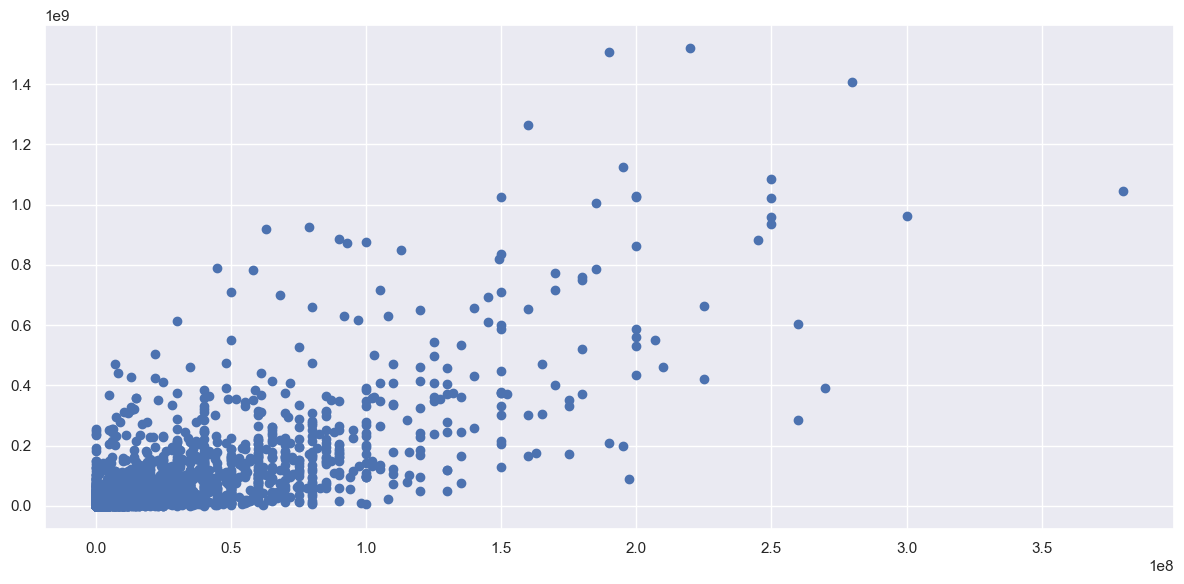

In [917]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["budget"],train_data["revenue"])
plt.tight_layout()

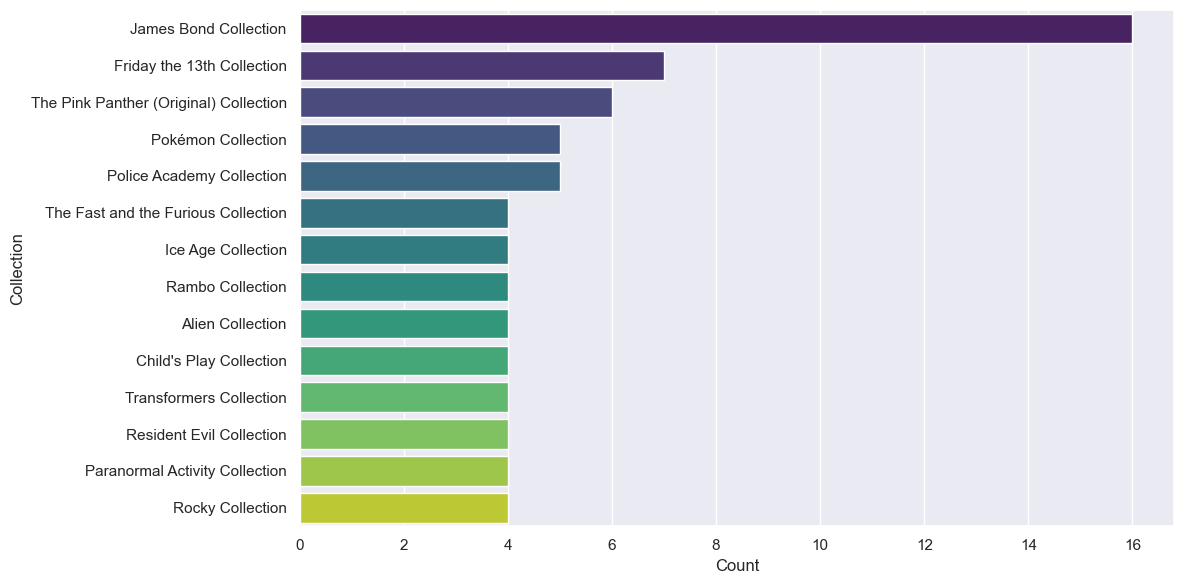

In [918]:
belongs_to_collection_data = train_data["belongs_to_collection"].value_counts()[:14].to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y=belongs_to_collection_data["index"],x=belongs_to_collection_data["belongs_to_collection"],palette="viridis")
plt.xlabel("Count")
plt.ylabel("Collection")
plt.tight_layout()

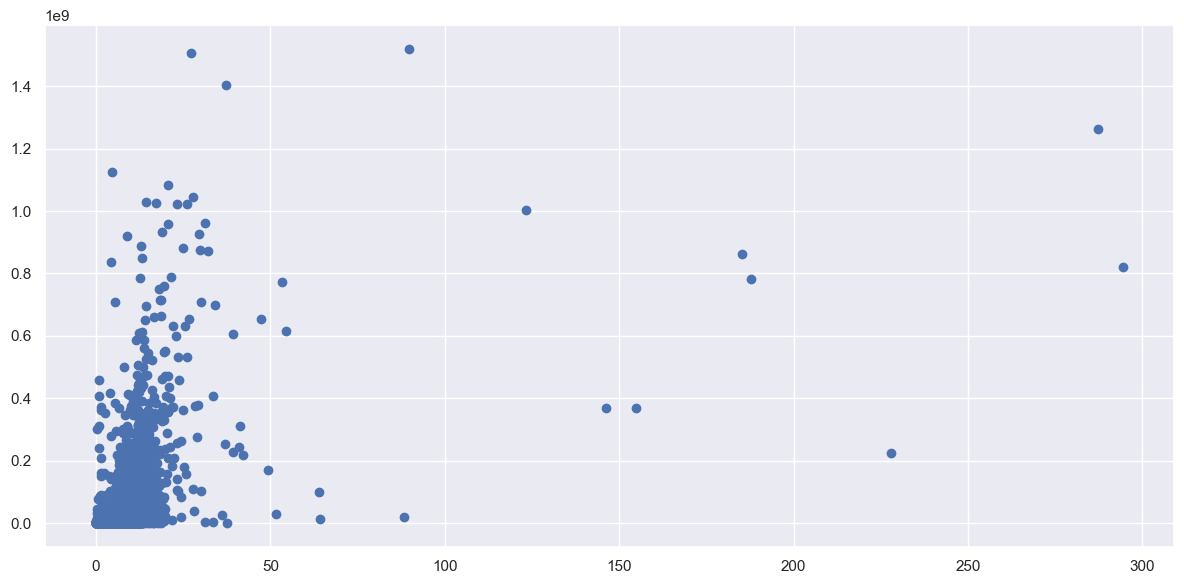

In [919]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["popularity"],train_data["revenue"])
plt.tight_layout()

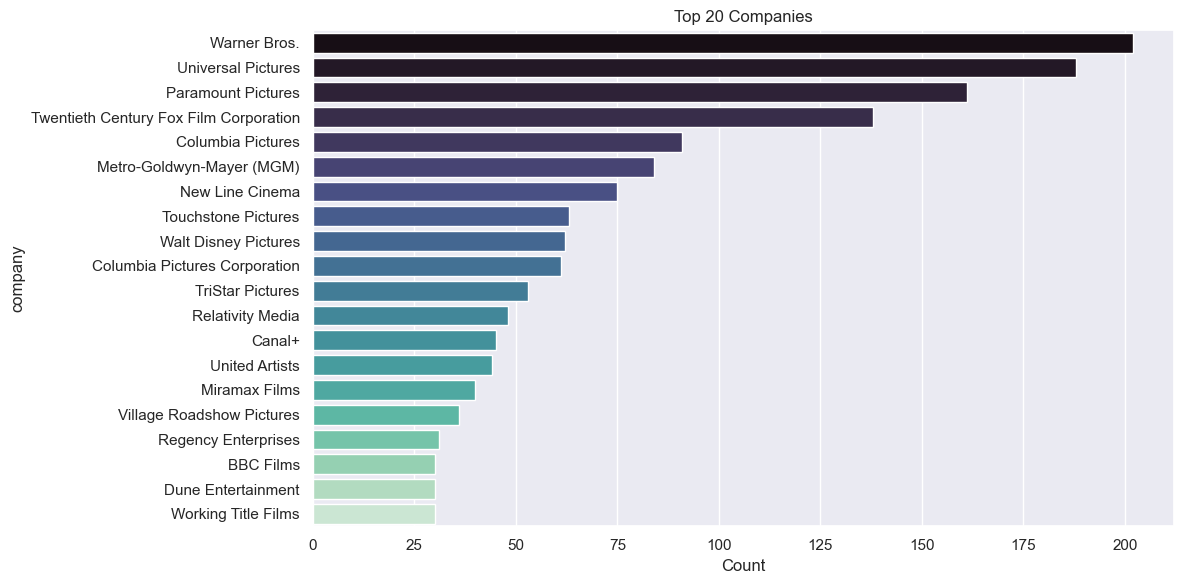

In [920]:
companies_count = (train_data["production_companies"].apply(lambda x: [i["name"] for i in x]))
companies_count = Counter([j for i in companies_count for j in i])
companies_count = companies_count.most_common()

companies_count = dict(companies_count)
company_data = pd.DataFrame({"company":companies_count.keys(),"Values":companies_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y = company_data[:20]["company"],x = company_data[:20]["Values"],palette="mako")
plt.title("Top 20 Companies")
plt.xlabel("Count")
plt.tight_layout()


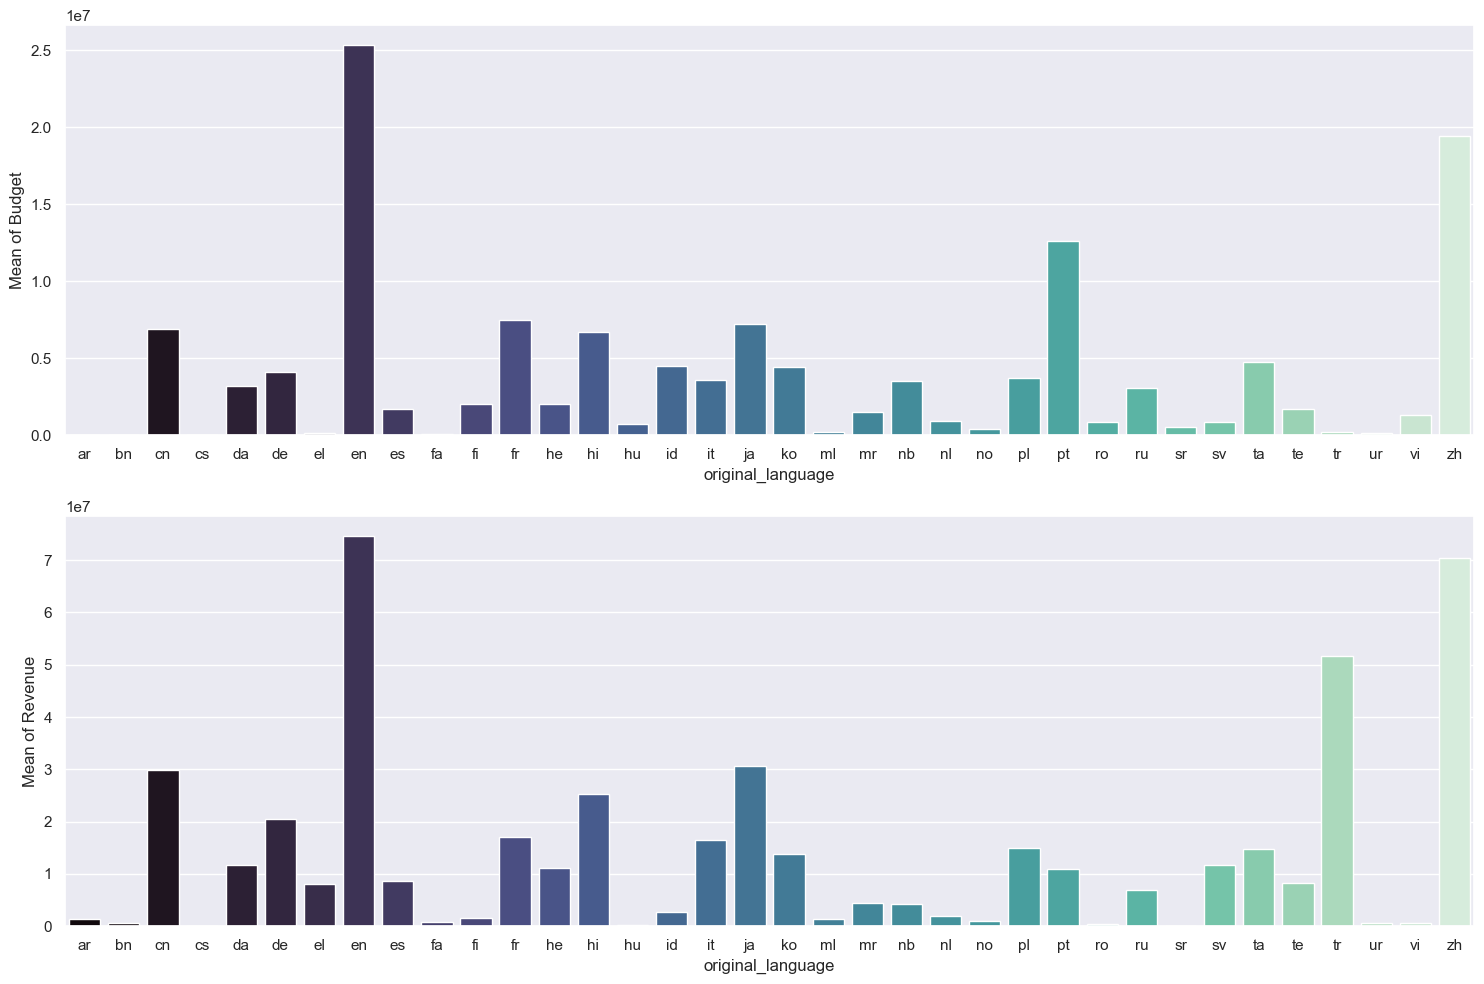

In [921]:
original_language_budget = train_data.groupby("original_language")[["budget","revenue"]].mean().reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["budget"],ax=ax[0],palette="mako")
ax1.set_ylabel("Mean of Budget")
ax2 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["revenue"],ax=ax[1],palette="mako")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

<Figure size 1300x600 with 0 Axes>

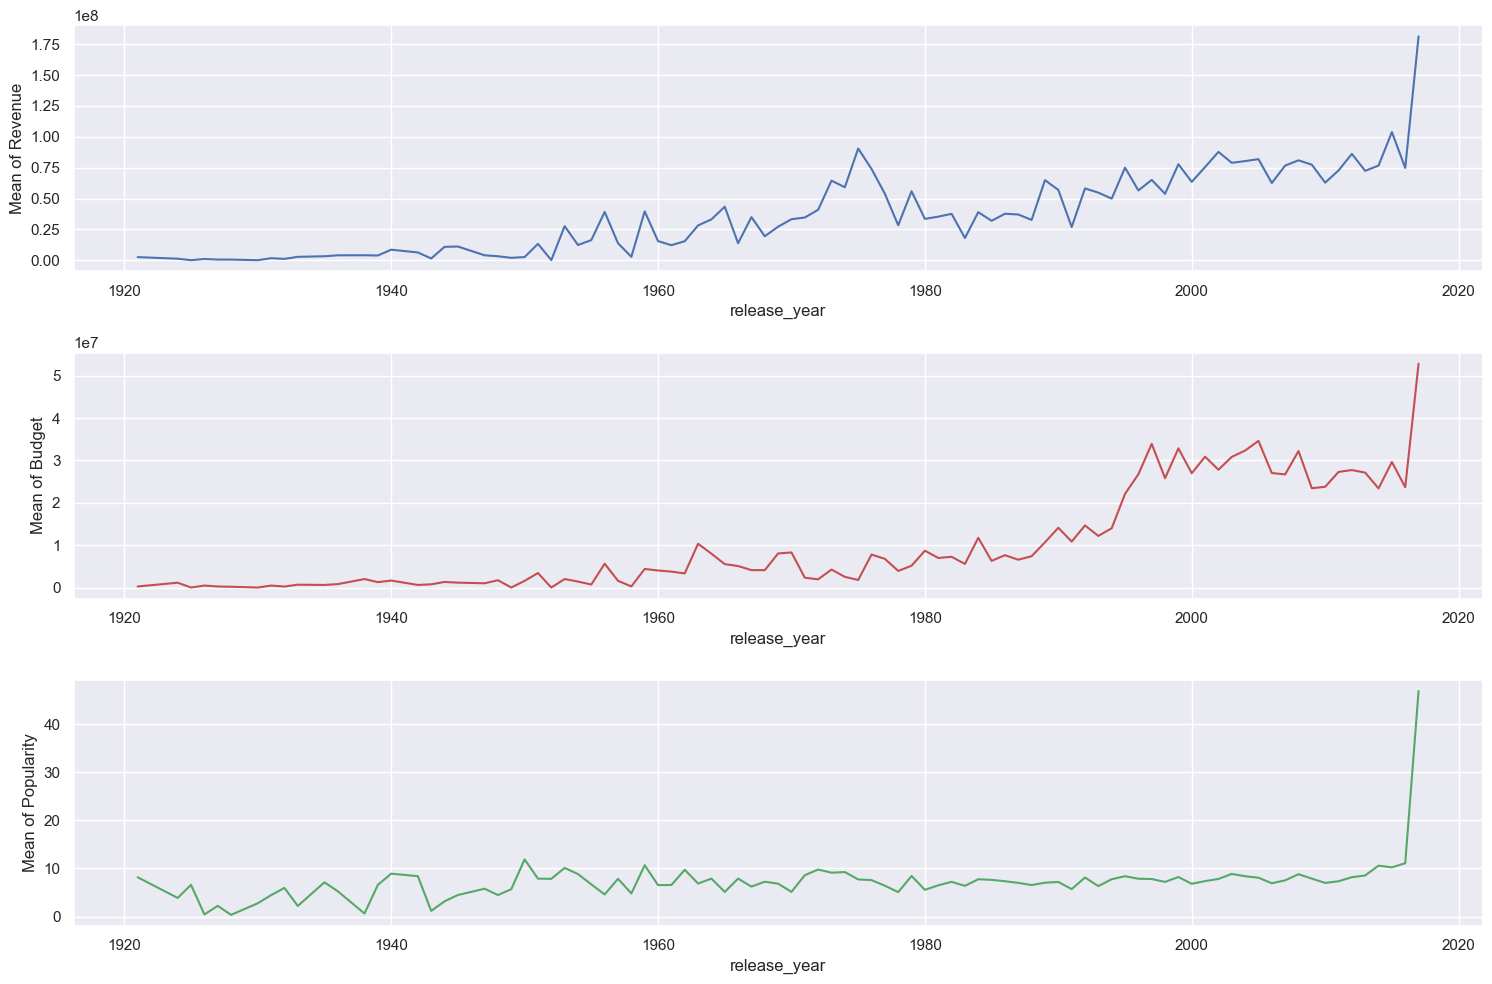

In [922]:
year_data = train_data.groupby("release_year")[["revenue","budget","popularity","runtime"]].mean().reset_index()
plt.figure(figsize=(13,6))
fig , ax = plt.subplots(3,1,figsize = (15,10))
ax1 = sns.lineplot(x=year_data["release_year"],y=year_data["revenue"],ax=ax[0])
ax1.set_ylabel("Mean of Revenue")
ax2 = sns.lineplot(x=year_data["release_year"],y=year_data["budget"],color="r",ax=ax[1])
ax2.set_ylabel("Mean of Budget")
ax3 = sns.lineplot(x=year_data["release_year"],y=year_data["popularity"],color="g",ax=ax[2])
ax3.set_ylabel("Mean of Popularity")
plt.tight_layout()

In [923]:
train_data.head(10)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania,runtime_processed
0,Hot Tub Time Machine Collection,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0,0,0,0,0,0,0,0,0,93.0
1,The Princess Diaries Collection,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0,0,0,0,0,0,0,0,0,113.0
2,Whiplash Collection,3300000,"[{'id': 18, 'name': 'Drama'}]",1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0,0,0,0,0,0,0,0,0,105.0
3,Kahaani Collection,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0,0,0,0,0,0,0,0,0,122.0
4,Marine Boy Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0,0,0,0,0,0,0,0,0,118.0
5,Pinocchio and the Emperor of the Night Collection,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,0,0,0,0,0,0,0,0,0,83.0
6,The Possession Collection,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",1,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,0,0,0,0,0,0,0,0,0,92.0
7,Control Room Collection,0,"[{'id': 99, 'name': 'Documentary'}]",0,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,0,0,0,0,0,0,0,0,0,84.0
8,The Muppet Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",0,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,0,0,0,0,0,0,0,0,0,100.0
9,A Mighty Wind Collection,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",0,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,...,0,0,0,0,0,0,0,0,0,91.0


In [936]:
for i in train_data['genres']:
    print(type(i))

train_data['genres'] = train_data['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data['genres'] = test_data['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
  
    


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

TypeError: eval() arg 1 must be a string, bytes or code object

In [924]:
# Create Genres columns with count of genres
train_data['genres_count'] = train_data['genres'].apply(lambda x: len(x))

list_of_genres = list(train_data['genres'])
# Create all_genres column with all genres
train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')

# # Create genres_[genre name] column with 1 if movie has this genre and 0 if not
# train_data["genre_count"] = train_data["genres"].apply(lambda x: len(x))
# train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train_data['genre_' + g] = train_data['all_genres'].apply(lambda x: 1 if g in x else 0)
test_data["genre_count"] = test_data["genres"].apply(lambda x: len(x))
test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')
# test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test_data['genre_' + g] = test_data['all_genres'].apply(lambda x: 1 if g in x else 0)

train_data.head(10)

TypeError: object of type 'float' has no len()

In [ ]:
# all columns in list of columnx
list_of_columns = list(train_data.columns)
list_of_columns


['belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek',
 'release_quarter',
 'tconst',
 'averageRating',
 'numVotes',
 'languages_count',
 'all_languages',
 'language_English',
 'language_Français',
 'language_Español',
 'language_Deutsch',
 'language_Pусский',
 'language_Italiano',
 'language_日本語',
 'language_普通话',
 'language_हिन्दी',
 'language_',
 'language_Português',
 'language_العربية',
 'language_한국어/조선말',
 'language_广州话 / 廣州話',
 'language_தமிழ்',
 'language_Polski',
 'language_Magyar',
 'language_Latin',
 'language_svenska',
 'language_ภาษาไทย',
 'language_Český',
 'language_עִבְרִית',
 'language_ελληνικά',
 'language_Türkçe',
 'lang

In [ ]:
columns_to_drop=["all_genres","all_languages","all_production_companies","belongs_to_collection","genres","homepage","imdb_id","status","original_title","overview","poster_path","production_companies","production_countries","all_production_countries" ,"release_date","spoken_languages","tagline","title","Keywords","cast","crew","release_day_name"]
train_data.drop(columns_to_drop,axis=1,inplace=True)

KeyError: "['all_genres', 'release_day_name'] not found in axis"

# Prediction


In [ ]:
# Split data into X and y
X = train_data.drop(['revenue'], axis=1)
y = train_data['revenue']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

